In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#　訓練データ
import requests
import csv
import os
import pandas as pd
from sklearn.cross_validation import train_test_split

birthdata_url = 'https://raw.githubusercontent.com/nfmcclure/tensorflow_cookbook/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat'
birth_file = requests.get(birthdata_url)
birth_data = birth_file.text.split('\r\n')
birth_header = birth_data[0].split('\t')
birth_data = [[float(x) for x in y.split('\t') if len(x) >= 1]  
              for y in birth_data[1:] if len(y) >= 1]

with open("birth_weight.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows([birth_header])
    writer.writerows(birth_data)
    f.close()

def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return np.nan_to_num((m-col_min)/(col_max-col_min))

df = pd.read_csv("birth_weight.csv")
target_name = ["BWT"]
X, y = df[df.columns.drop(target_name)], df[target_name]
X, y = X.as_matrix(), y.as_matrix()
X = normalize_cols(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)

In [2]:
import pandas as pd
from sklearn.cross_validation import train_test_split

data = np.loadtxt('../data/chisato/goal/log201805261417.csv', delimiter=',', dtype='float')
#print(data.shape)
rx = np.array([data[:,0]])
ry = np.array([data[:,1]])
jx = np.array([data[:,2]])
jy = np.array([data[:,3]])
robo = np.transpose(np.concatenate([rx,ry],axis=0))
joy = np.transpose(np.concatenate([jx,jy],axis=0))
X_train, X_test, y_train, y_test = train_test_split(robo,joy,test_size=0.2,random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

C:\Users\cihsato\Anaconda3\envs\tensorflow16\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#　初期化
X = X_train
y = y_train.ravel()
sess = tf.Session()
seed = 3
tf.set_random_seed(seed)
np.random.seed(seed)

x_data = tf.placeholder(shape=[None, X.shape[1]], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [4]:
hidden_size = [25, 10, 3]
batch_size = 100
iter_size = 200

#　隠れ層の作成 （last layerに直結）
weights = []
biases = []
layers = []
tmp_size = X.shape[1]
last_layer = x_data
for hsize in hidden_size:
    weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, hsize], stddev=10.0)))
    biases.append(tf.Variable(tf.random_normal(shape=[hsize], stddev=10.0)))
    layers.append(tf.nn.relu(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))) # 活性化関数
    tmp_size = hsize
    last_layer = layers[-1]
    print(layers[-1])
#　出力層
weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, 2], stddev=10.0)))
biases.append(tf.Variable(tf.random_normal(shape=[2], stddev=10.0)))
layers.append(tf.nn.relu(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1])))
final_output = layers[-1]
print(final_output)

Tensor("Relu:0", shape=(?, 25), dtype=float32)
Tensor("Relu_1:0", shape=(?, 10), dtype=float32)
Tensor("Relu_2:0", shape=(?, 3), dtype=float32)
Tensor("Relu_3:0", shape=(?, 2), dtype=float32)


In [5]:
#　学習
loss = tf.reduce_mean(tf.abs(y_target - final_output))
opt = tf.train.AdamOptimizer(0.05)
train_step = opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)
loss_vec=[]
for i in range(iter_size):
    rand_index = np.random.choice(len(X), size=batch_size)
    rand_x = X[rand_index]
    rand_y = np.transpose([y[rand_index]])
    sess.run(train_step, feed_dict={x_data:rand_x, y_target: rand_y})
    loss_vec.append(sess.run(loss, feed_dict={x_data:rand_x, y_target: rand_y}))
    if (i+1)%25==0:
        print('Generation:'+str(i+1)+', Loss = '+str(loss_vec[-1]))

Generation:25, Loss = 0.5115454
Generation:50, Loss = 0.57711184
Generation:75, Loss = 0.56845397
Generation:100, Loss = 0.6272168
Generation:125, Loss = 0.53309083
Generation:150, Loss = 0.5903073
Generation:175, Loss = 0.6061862
Generation:200, Loss = 0.57237184


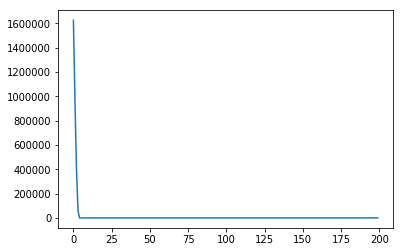

In [6]:
plt.plot(loss_vec)